<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Obtaining-specific-properties-of-water-using-CoolProp-package" data-toc-modified-id="Obtaining-specific-properties-of-water-using-CoolProp-package-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Obtaining specific properties of water using <code>CoolProp</code> package</a></span><ul class="toc-item"><li><span><a href="#state-1:-superheated-water" data-toc-modified-id="state-1:-superheated-water-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>state 1: superheated water</a></span></li><li><span><a href="#state-2:-saturated-water" data-toc-modified-id="state-2:-saturated-water-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>state 2: saturated water</a></span></li></ul></li><li><span><a href="#Plotting-temperature-(T)---specific-enthalpy-(h)-diagram-for-water-at-a-given-pressure-(P)" data-toc-modified-id="Plotting-temperature-(T)---specific-enthalpy-(h)-diagram-for-water-at-a-given-pressure-(P)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting temperature (<code>T</code>) - specific enthalpy (<code>h</code>) diagram for water at a given pressure (<code>P</code>)</a></span></li><li><span><a href="#An-Interactive-plot-of-temperature-(T)---specific-enthalpy-(h)-diagram-for-water-at-a-given-pressure-(P)" data-toc-modified-id="An-Interactive-plot-of-temperature-(T)---specific-enthalpy-(h)-diagram-for-water-at-a-given-pressure-(P)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>An Interactive plot of temperature (<code>T</code>) - specific enthalpy (<code>h</code>) diagram for water at a given pressure (<code>P</code>)</a></span></li><li><span><a href="#temperature-(T)---specific-enthalpy-(h)-diagram-for-water-for-varying-pressures-(P)" data-toc-modified-id="temperature-(T)---specific-enthalpy-(h)-diagram-for-water-for-varying-pressures-(P)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>temperature (<code>T</code>) - specific enthalpy (<code>h</code>) diagram for water for varying pressures (<code>P</code>)</a></span></li><li><span><a href="#Tracking-the-boundary-between-saturated-water,-mixture-and-superheated-vapor" data-toc-modified-id="Tracking-the-boundary-between-saturated-water,-mixture-and-superheated-vapor-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tracking the boundary between saturated water, mixture and superheated vapor</a></span></li><li><span><a href="#Work-in-progress:-using-plotly-to-get-a-sense-of-T$_{sat}$-for-a-given-pressure" data-toc-modified-id="Work-in-progress:-using-plotly-to-get-a-sense-of-T$_{sat}$-for-a-given-pressure-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Work in progress: using <code>plotly</code> to get a sense of T$_{sat}$ for a given pressure</a></span></li><li><span><a href="#A-plotly-dahsboard-to-interactive-with-property-diagrams" data-toc-modified-id="A-plotly-dahsboard-to-interactive-with-property-diagrams-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>A plotly dahsboard to interactive with property diagrams</a></span></li></ul></div>

## Obtaining specific properties of water using `CoolProp` package

### state 1: superheated water

Given a temperature and pressure for a "fluid" of choice, `CoolProp` let's you calculate the specific properties of this system at the given conditions. see here for supported fluids in CoolProp: http://coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids

Here let's take T = 300 $^{\circ}$C or 673.15 K and pressure = 100 kPa

First, import the CoolProp package and the CoolProp module inside it as `CP`

In [1]:
import CoolProp.CoolProp as CP

In [2]:
# Define the state properties
T = 273.15 + 300  # Temperature in K
P = 1e5  # Pressure in Pa; (this is 100 kPa!)

## the above state is superheated water!! 

# Calculate specific properties using CoolProp
density = CP.PropsSI('D', 'T', T, 'P', P, 'Water')  # Density in kg/m^3
vol = CP.PropsSI('V', 'T', T, 'P', P, 'Water')  # Density in m^3/kg
specific_internal_energy = CP.PropsSI('U', 'T', T, 'P', P, 'Water')  # Specific intenral energy in kg/m^3
specific_enthalpy = CP.PropsSI('H', 'T', T, 'P', P, 'Water')  # Specific enthalpy in kJ/kg
specific_entropy = CP.PropsSI('S', 'T', T, 'P', P, 'Water')  # Specific entropy in kJ/(kg K)

# Print the results
print("Density: {} kg/m^3".format(round(density,3)))
print("vol: {} m^3/kg".format(round(vol,7)))
print("Specific internal energy: {} kJ/(kg K)".format(round(specific_internal_energy/1000,1)))
print("Specific Enthalpy: {} kJ/kg".format(round(specific_enthalpy/1000,1)))
print("Specific Entropy: {} kJ/(kg K)".format(round(specific_entropy/1000,3)))

Density: 0.379 kg/m^3
vol: 2.03e-05 m^3/kg
Specific internal energy: 2810.6 kJ/(kg K)
Specific Enthalpy: 3074.5 kJ/kg
Specific Entropy: 8.217 kJ/(kg K)


Looking at the textbook (A. Çengel and M. A. Boles, **Thermodynamics: An Engineering Approach**, 5 th ed, McGraw-Hill, 2006.) in the Superheated water section (P = 0.1MPa and T$_{sat}$ = 300 $^{\circ}$C): 

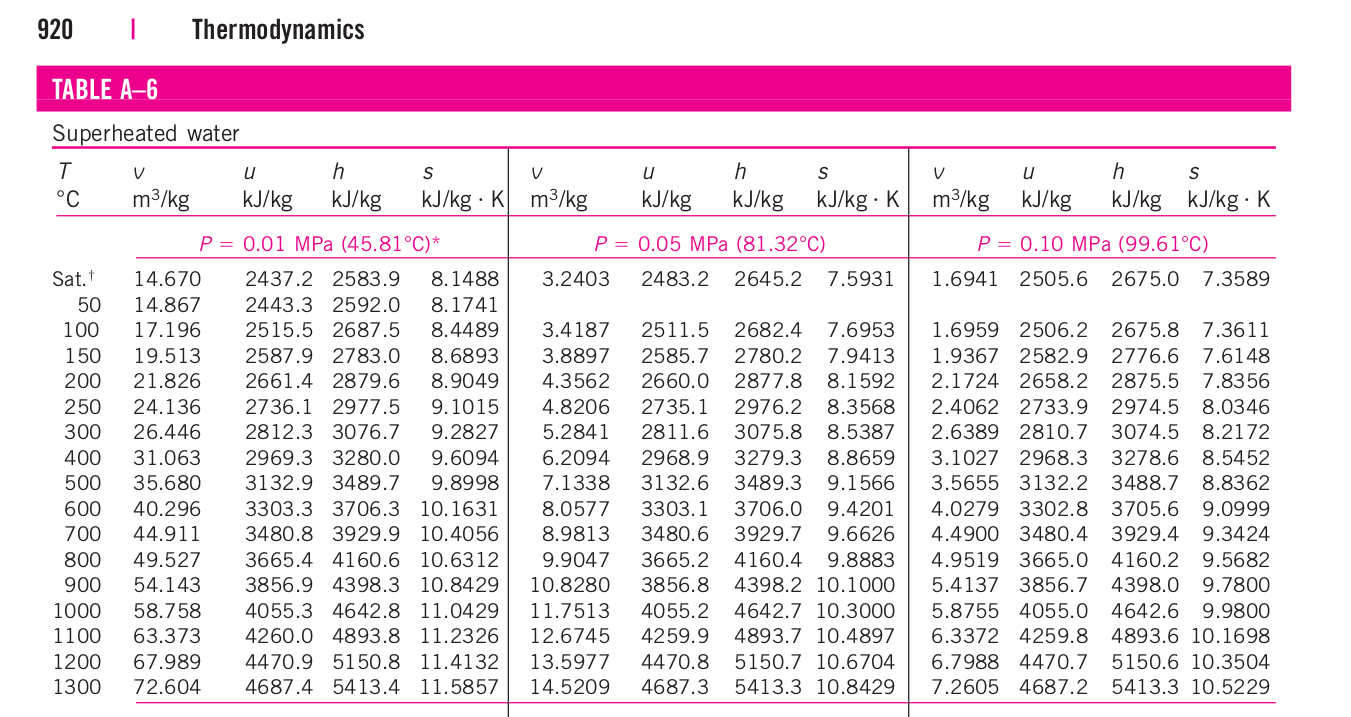

### state 2: saturated water

In [3]:
import CoolProp.CoolProp as CP

# Define the state properties
T = 273.15 + 100. # Temperature in K
P = 1.0262e5  # Pressure in Pa; (this is 1 atm)

## the above state is superheated water!! (P > Psat)

# Calculate specific properties using CoolProp
density = CP.PropsSI('D', 'T', T, 'P', P, 'Water')  # Density in kg/m^3
vol = CP.PropsSI('V', 'T', T, 'P', P, 'Water')  # Density in m^3/kg

specific_internal_energy = CP.PropsSI('U', 'T', T, 'P', P, 'Water')  # Density in kg/m^3
specific_enthalpy = CP.PropsSI('H', 'T', T, 'P', P, 'Water')  # Specific enthalpy in J/kg
specific_entropy = CP.PropsSI('S', 'T', T, 'P', P, 'Water')  # Specific entropy in J/(kg K)

# Print the results
print("Density: {} kg/m^3".format(round(density,3)))
print("vol: {} m^3/kg".format(round(vol,7)))
print("Specific internal energy: {} kJ/(kg K)".format(round(specific_internal_energy/1000,3)))
print("Specific Enthalpy: {} kJ/kg".format(round(specific_enthalpy/1000,3)))
print("Specific Entropy: {} kJ/(kg K)".format(round(specific_entropy/1000,3)))

Density: 958.35 kg/m^3
vol: 0.0002816 m^3/kg
Specific internal energy: 419.06 kJ/(kg K)
Specific Enthalpy: 419.167 kJ/kg
Specific Entropy: 1.307 kJ/(kg K)


Looking at the textbook (A. Çengel and M. A. Boles, **Thermodynamics: An Engineering Approach**, 5 th ed, McGraw-Hill, 2006.) in the Superheated water section (P$_{sat}$ = 0.10142 MPa and T = 100 $^{\circ}$C): 

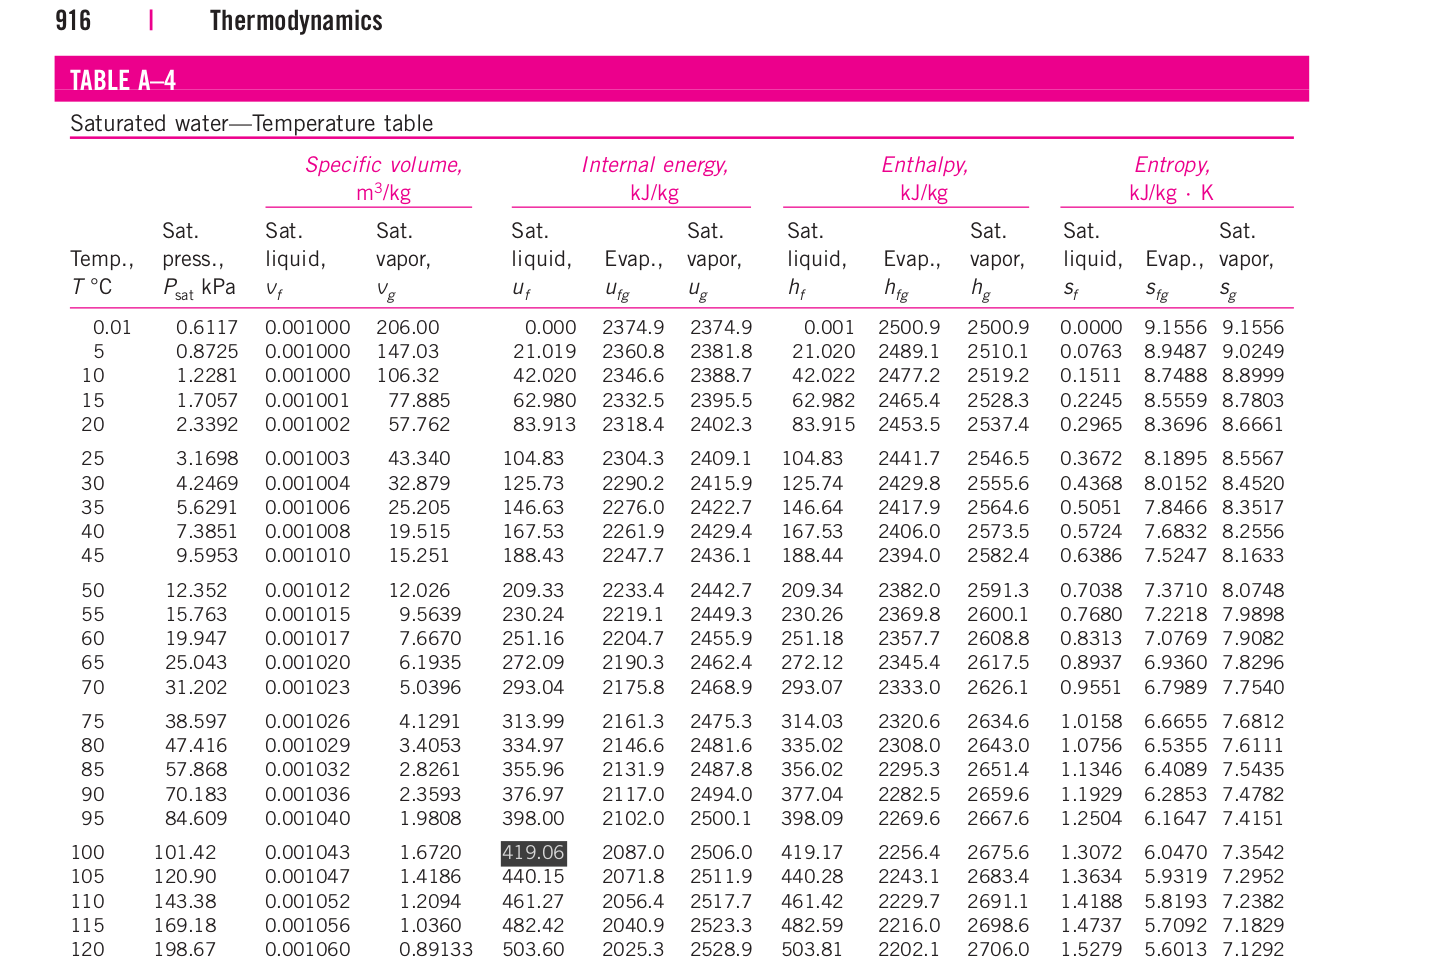

## Plotting temperature (`T`) - specific enthalpy (`h`) diagram for water at a given pressure (`P`)

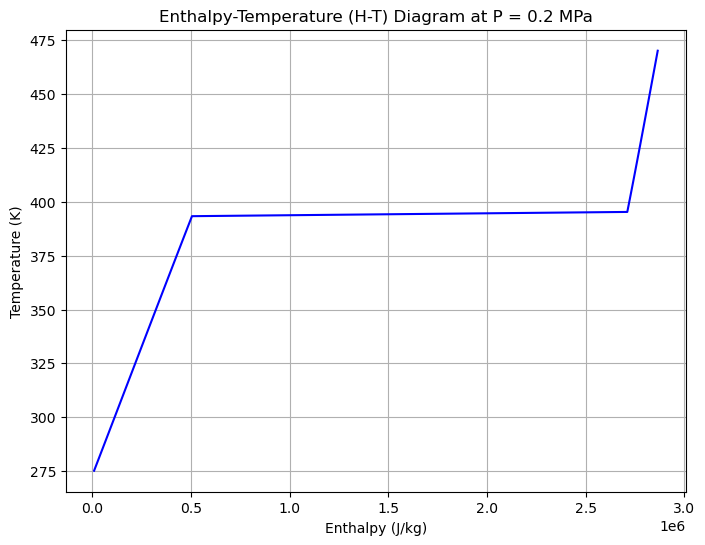

In [4]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

# Define the substance and range of temperatures
substance = 'Water'
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 470.15  # Maximum temperature in Kelvin
P = 2e5  # Pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Calculate enthalpy values for the given temperatures at the specified pressure
h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', P, 'Water') for T in T_vals]
h_vapor_vals = [CP.PropsSI('H', 'T', T, 'P', P, 'Water') for T in T_vals]

# Create an H-T diagram
plt.figure(figsize=(8, 6))
plt.plot(h_liquid_vals, T_vals, 'b-')
#plt.plot(h_vapor_vals, T_vals, 'r-', label='Saturated Vapor')
plt.xlabel('Enthalpy (J/kg)')
plt.ylabel('Temperature (K)')
plt.title('Enthalpy-Temperature (H-T) Diagram at P = {} MPa'.format(P/1e6))
plt.grid(True)
plt.show()


## An Interactive plot of temperature (`T`) - specific enthalpy (`h`) diagram for water at a given pressure (`P`)

In [5]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the substance and range of temperatures
substance = 'Water'
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 1170.15  # Maximum temperature in Kelvin
P = 1e5  # Initial pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Create an interactive widget to vary the pressure
pressure_slider = widgets.FloatLogSlider(
    value=P,
    base=10,
    min=np.log10(1e3),
    max=np.log10(1e8),
    step=0.01,
    description='Pressure (Pa)',
    readout_format='.1e'
)

# Define a function to update the H-T diagram based on the pressure value
def update_plot(pressure):
    # Calculate enthalpy values for the given temperatures at the updated pressure
    h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', pressure, 'Water') for T in T_vals]
    h_vapor_vals = [CP.PropsSI('H', 'T', T, 'P', pressure, 'Water') for T in T_vals]
    plt.plot(np.array(h_liquid_vals)/1000, T_vals, 'b-', label='P = {} MPa'.format(round(pressure/1e6,1)))
    plt.xlabel('Enthalpy (kJ/kg)')
    plt.ylabel('Temperature (K)')
    plt.grid()
    plt.legend()
    plt.title('Enthalpy-Temperature (H-T) Diagram')

# Connect the pressure slider with the update function
widgets.interact(update_plot, pressure=pressure_slider)

interactive(children=(FloatLogSlider(value=100000.0, description='Pressure (Pa)', max=8.0, min=3.0, readout_fo…

<function __main__.update_plot(pressure)>

In [6]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the range of temperatures
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 1170.15  # Maximum temperature in Kelvin
P_min = 1e3  # Minimum pressure in Pa
P_max = 1e8  # Maximum pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Create an array of pressures
P_vals = np.logspace(np.log10(P_min), np.log10(P_max), 100)

# Define the fluid options
fluid_options = ["Water", "Ethanol", "Methanol"]

# Create dropdown widgets for fluid, y-axis label, and x-axis label
fluid_dropdown = widgets.Dropdown(
    options=fluid_options, value="Water", description="Fluid:"
)

y_label_dropdown = widgets.Dropdown(
    options=["Enthalpy (kJ/kg)", "Entropy (kJ/(kg·K))"],
    value="Enthalpy (kJ/kg)",
    description="Y-Axis:",
)

x_label_dropdown = widgets.Dropdown(
    options=["Temperature (K)", "Pressure (Pa)"],
    value="Temperature (K)",
    description="X-Axis:",
)

# Create an interactive widget to vary the pressure
pressure_slider = widgets.FloatLogSlider(
    value=P_min,
    base=10,
    min=np.log10(P_min),
    max=np.log10(P_max),
    step=0.01,
    description="Pressure (Pa)",
    readout_format=".1e",
)

# Create an interactive widget to vary the temperature
temperature_slider = widgets.FloatSlider(
    value=T_min, min=T_min, max=T_max, step=1, description="Temperature (K)"
)

# Define a function to update the H-T diagram based on the pressure value and selected options
def update_plot(fluid, y_label, x_label, pressure, temperature):
    if x_label == "Temperature (K)" and y_label == "Enthalpy (kJ/kg)":
        h_vals = [CP.PropsSI("H", "T", T, "P", pressure, fluid) for T in T_vals]
        y_vals = np.array(h_vals) / 1000
        y_axis_label = y_label
        x_vals = T_vals
        x_axis_label = x_label
    elif x_label == "Temperature (K)" and y_label == "Entropy (kJ/(kg·K))":
        s_vals = [CP.PropsSI("S", "T", T, "P", pressure, fluid) for T in T_vals]
        y_vals = np.array(s_vals) / 1000
        y_axis_label = y_label
        x_vals = T_vals
        x_axis_label = x_label
    elif x_label == "Pressure (Pa)" and y_label == "Enthalpy (kJ/kg)":
        h_vals = [CP.PropsSI("H", "T", temperature, "P", P, fluid) for P in P_vals]
        y_vals = np.array(h_vals) / 1000
        y_axis_label = y_label
        x_vals = P_vals
        x_axis_label = x_label
    elif x_label == "Pressure (Pa)" and y_label == "Entropy (kJ/(kg·K))":
        s_vals = [CP.PropsSI("S", "T", temperature, "P", P, fluid) for P in P_vals]
        y_vals = np.array(s_vals) / 1000
        y_axis_label = y_label
        x_vals = P_vals
        x_axis_label = x_label

    # Clear the current plot
    plt.clf()

    # Plot the H-T diagram with flipped axes labels
    plt.plot(y_vals, x_vals, "b-", label="Fluid: {}".format(fluid))
    plt.xlabel(y_axis_label)
    plt.ylabel(x_axis_label)
    plt.grid()
    plt.legend()
    plt.title("Enthalpy-Temperature (H-T) Diagram")
    plt.show()


# Connect the pressure slider, temperature slider, and dropdown widgets with the update function
widgets.interact(
    update_plot,
    fluid=fluid_dropdown,
    y_label=y_label_dropdown,
    x_label=x_label_dropdown,
    pressure=pressure_slider,
    temperature=temperature_slider,
)


interactive(children=(Dropdown(description='Fluid:', options=('Water', 'Ethanol', 'Methanol'), value='Water'),…

<function __main__.update_plot(fluid, y_label, x_label, pressure, temperature)>

In [7]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the range of temperatures
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 1170.15  # Maximum temperature in Kelvin
P_min = 1e3  # Minimum pressure in Pa
P_max = 1e8  # Maximum pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Create an array of pressures
P_vals = np.logspace(np.log10(P_min), np.log10(P_max), 100)

# Define the fluid options
fluid_options = ["Water", "Ethanol", "Methanol","CarbonDioxide"]

# Create dropdown widgets for fluid, y-axis label, and x-axis label
fluid_dropdown = widgets.Dropdown(
    options=fluid_options, value="Water", description="Fluid:"
)

y_label_dropdown = widgets.Dropdown(
    options=["Enthalpy (kJ/kg)", "Entropy (kJ/(kg·K))"],
    value="Enthalpy (kJ/kg)",
    description="Y-Axis:",
)

x_label_dropdown = widgets.Dropdown(
    options=["Temperature (K)", "Pressure (Pa)"],
    value="Temperature (K)",
    description="X-Axis:",
)

# Create an interactive widget to vary the pressure
pressure_slider = widgets.FloatLogSlider(
    value=P_min,
    base=10,
    min=np.log10(P_min),
    max=np.log10(P_max),
    step=0.01,
    description="Pressure (Pa)",
    readout_format=".1e",
)

# Create an interactive widget to vary the temperature
temperature_slider = widgets.FloatSlider(
    value=T_min, min=T_min, max=T_max, step=1, description="Temperature (K)"
)
def update_plot(fluid, y_label, x_label, pressure, temperature):
    pressure_slider.disabled = x_label == "Pressure (Pa)"
    temperature_slider.disabled = x_label == "Temperature (K)"
    
    if x_label == "Temperature (K)" and y_label == "Enthalpy (kJ/kg)":
        h_vals = [CP.PropsSI("H", "T", T, "P", pressure, fluid) for T in T_vals]
        x_vals = np.array(h_vals) / 1000
        x_axis_label = y_label
        y_vals = T_vals
        y_axis_label = x_label
    elif x_label == "Temperature (K)" and y_label == "Entropy (kJ/(kg·K))":
        s_vals = [CP.PropsSI("S", "T", T, "P", pressure, fluid) for T in T_vals]
        x_vals = np.array(s_vals) / 1000
        x_axis_label = y_label
        y_vals = T_vals
        y_axis_label = x_label
    elif x_label == "Pressure (Pa)" and y_label == "Enthalpy (kJ/kg)":
        h_vals = [CP.PropsSI("H", "T", temperature, "P", P, fluid) for P in P_vals]
        x_vals = np.array(h_vals) / 1000
        x_axis_label = y_label
        y_vals = np.array(P_vals)
        y_axis_label = x_label
    elif x_label == "Pressure (Pa)" and y_label == "Entropy (kJ/(kg·K))":
        s_vals = [CP.PropsSI("S", "T", temperature, "P", P, fluid) for P in P_vals]
        x_vals = np.array(s_vals) / 1000
        x_axis_label = y_label
        y_vals = np.array(P_vals)
        y_axis_label = x_label

    # Clear the current plot
    plt.clf()

    # Plot the H-T diagram with flipped axes labels
    plt.plot(x_vals, y_vals, "b-", label="Fluid: {}, P = {} MPa, T= {}".format(fluid,round(pressure/1e6,2),temperature))
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.grid()
    plt.legend()
    plt.title("{}-{} Diagram".format(y_axis_label,x_axis_label))
    plt.show()


# Connect the pressure slider, temperature slider, and dropdown widgets with the update function
widgets.interact(
    update_plot,
    fluid=fluid_dropdown,
    y_label=y_label_dropdown,
    x_label=x_label_dropdown,
    pressure=pressure_slider,
    temperature=temperature_slider,
)

interactive(children=(Dropdown(description='Fluid:', options=('Water', 'Ethanol', 'Methanol', 'CarbonDioxide')…

<function __main__.update_plot(fluid, y_label, x_label, pressure, temperature)>

##  temperature (`T`) - specific enthalpy (`h`) diagram for water for varying pressures (`P`)

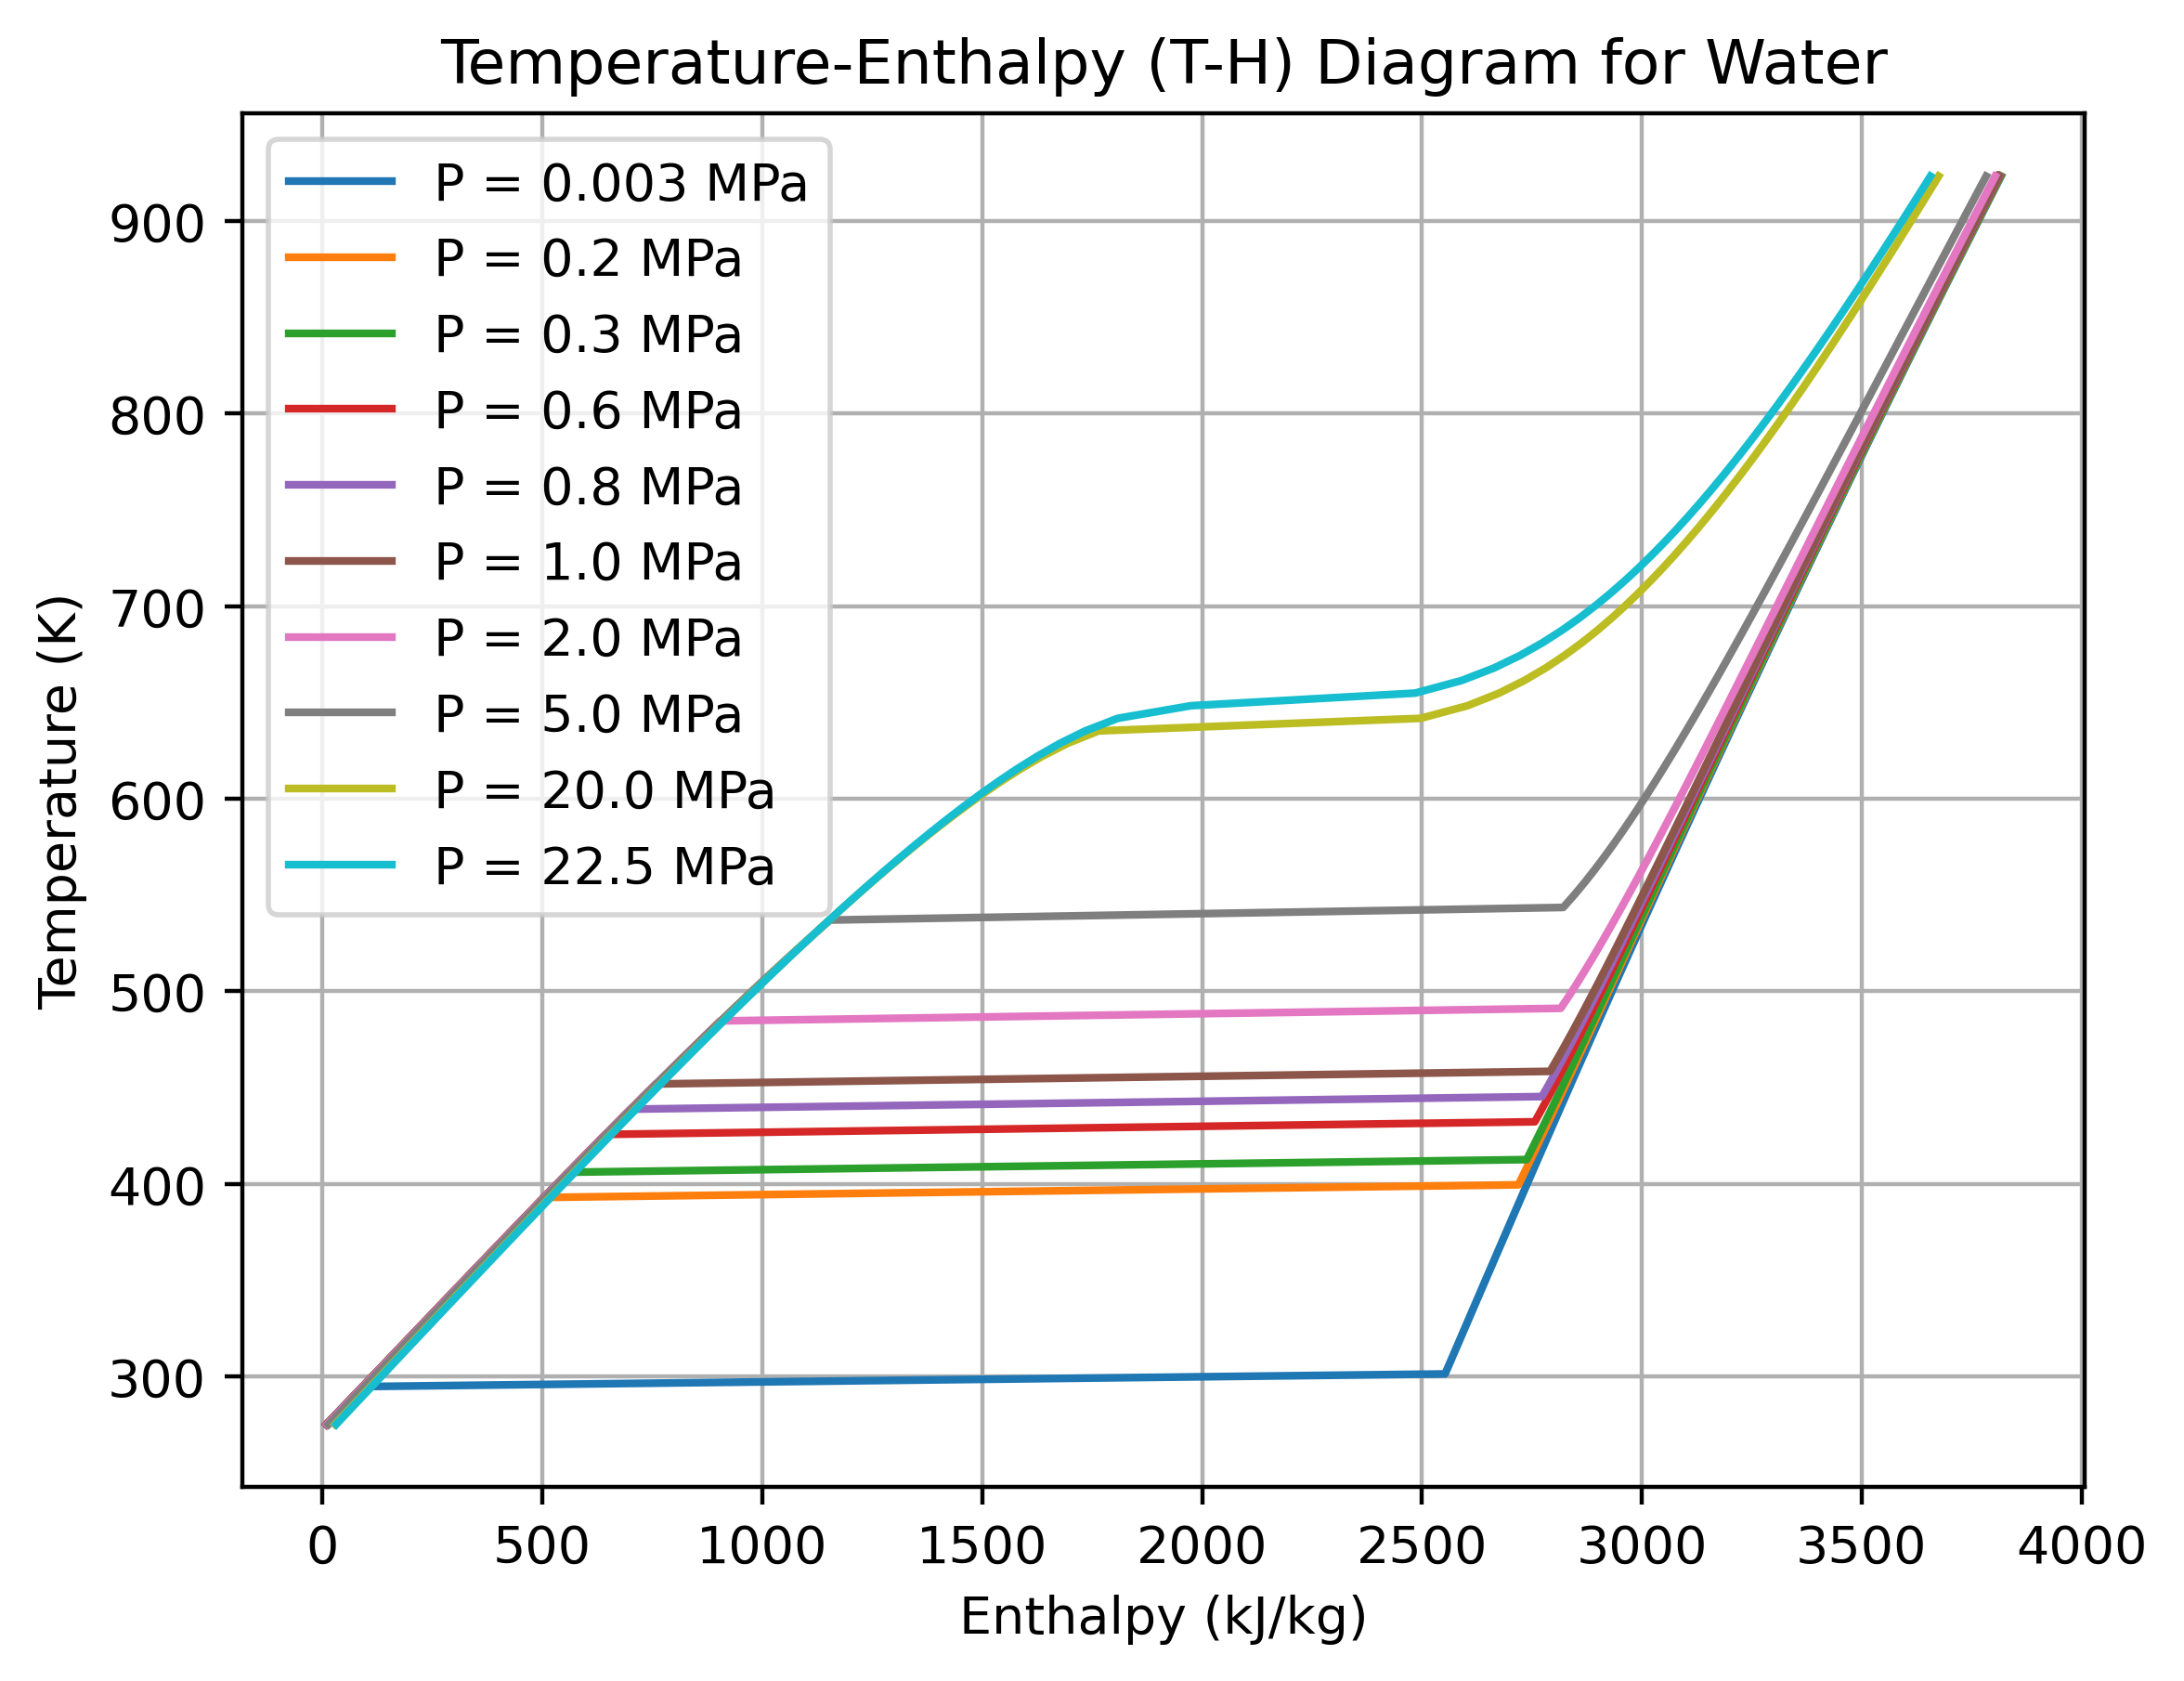

In [8]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

# Define the substance and range of temperatures
substance = 'Water'
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 650.15 + 273  # Maximum temperature in Kelvin
P_values = [3e3,2e5, 3e5,6e5,8e5,10e5,2e6,5e6, 20e6, 22.5e6]  # Pressure values in Pa

#45e5,100e5,150e5, 200e5,300e5
#4e4,35e5,1e5
# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)
plt.figure(dpi=400)

# Create an H-T diagram for each pressure value
for P in P_values:
    # Calculate enthalpy values for the given temperatures at the specified pressure
    h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', P, 'Water') for T in T_vals]
    h_vapor_vals = [CP.PropsSI('H', 'T', T, 'P', P, 'Water') for T in T_vals]

    # Plot the H-T diagram for the current pressure value
    plt.plot(np.array(h_liquid_vals)/1e3, T_vals, label='P = {} MPa'.format(P/10**6))
    
# Set plot attributes
plt.xlabel('Enthalpy (kJ/kg)')
plt.ylabel('Temperature (K)')
plt.title('Temperature-Enthalpy (T-H) Diagram for Water')
plt.grid(True)
plt.legend()
plt.show()

## Tracking the boundary between saturated water, mixture and superheated vapor

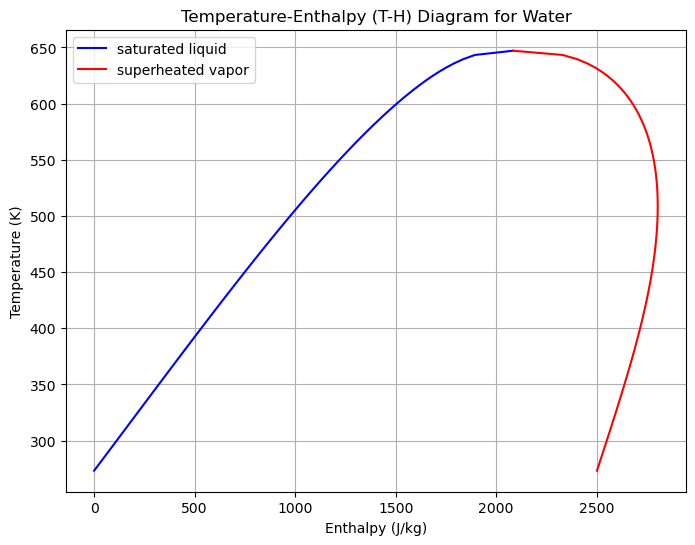

In [9]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

# Define the substance and range of temperatures
substance = 'Water'
T_min = 273.15  # Minimum temperature in Kelvin
T_max = 647.096  # Maximum temperature in Kelvin

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Calculate enthalpy values for the given temperatures at saturated liquid and vapor states
h_liquid_vals = [CP.PropsSI('H', 'T', T, 'Q', 0, substance) for T in T_vals]
h_vapor_vals = [CP.PropsSI('H', 'T', T, 'Q', 1, substance) for T in T_vals]

# Create an H-T diagram
plt.figure(figsize=(8, 6))
plt.plot(np.array(h_liquid_vals)/1e3, T_vals, 'b-', label='saturated liquid')
plt.plot(np.array(h_vapor_vals)/1e3, T_vals, 'r-', label='superheated vapor')
plt.xlabel('Enthalpy (J/kg)')
plt.ylabel('Temperature (K)')
plt.title('Temperature-Enthalpy (T-H) Diagram for {}'.format(substance))
plt.grid(True)
plt.legend()
plt.show()


## Work in progress: using `plotly` to get a sense of T$_{sat}$ for a given pressure

In [10]:
import CoolProp.CoolProp as CP
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Define the substance and range of temperatures
substance = 'Water'
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 1170.15  # Maximum temperature in Kelvin
P = 2e5  # Initial pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

 #Calculate enthalpy values for the given temperatures at the specified pressure
h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', P, 'Water') for T in T_vals]

# Create an initial trace for the H-T diagram
trace = go.Scatter(
    x=h_liquid_vals,
    y=T_vals,
    mode='lines',
    name='P = {} Pa'.format(P),
    line=dict(color='blue')
)

# Create a layout for the plot
layout = go.Layout(
    title='Enthalpy-Temperature (H-T) Diagram',
    xaxis=dict(title='Enthalpy (J/kg)'),
    yaxis=dict(title='Temperature (K)'),
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    #grid=dict(visible=True)
)

# Create the figure object
fig = go.Figure(data=[trace], layout=layout)

# Create an interactive widget to vary the pressure
pressure_slider = widgets.FloatLogSlider(
    value=P,
    base=10,
    min=np.log10(1e3),
    max=np.log10(1e8),
    step=0.01,
    description='Pressure (Pa)',
    readout_format='.1e'
)

# Define a function to update the H-T diagram based on the pressure value
def update_plot(pressure):
    # Calculate enthalpy values for the given temperatures at the updated pressure
    h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', pressure, 'Water') for T in T_vals]

    # Update the trace with the new data
    fig.data[0].x = h_liquid_vals
    fig.data[0].name = 'P = {} Pa'.format(pressure)
    fig.update_layout(title='Enthalpy-Temperature (H-T) Diagram at P = {} Pa'.format(pressure))
    fig.update()
    # Connect the pressure slider with the update function
    widgets.interact(update_plot, pressure=pressure_slider)
# Display the plot
display(fig)
display(pressure_slider)

FloatLogSlider(value=200000.0, description='Pressure (Pa)', max=8.0, min=3.0, readout_format='.1e', step=0.01)

Looking at the textbook (A. Çengel and M. A. Boles, **Thermodynamics: An Engineering Approach**, 5 th ed, McGraw-Hill, 2006.) in the Superheated water section (P = 0.2MPa and T$_{sat}$ = 120.21 $^{\circ}$C, which is ~ 393 $^{\circ} C$): 

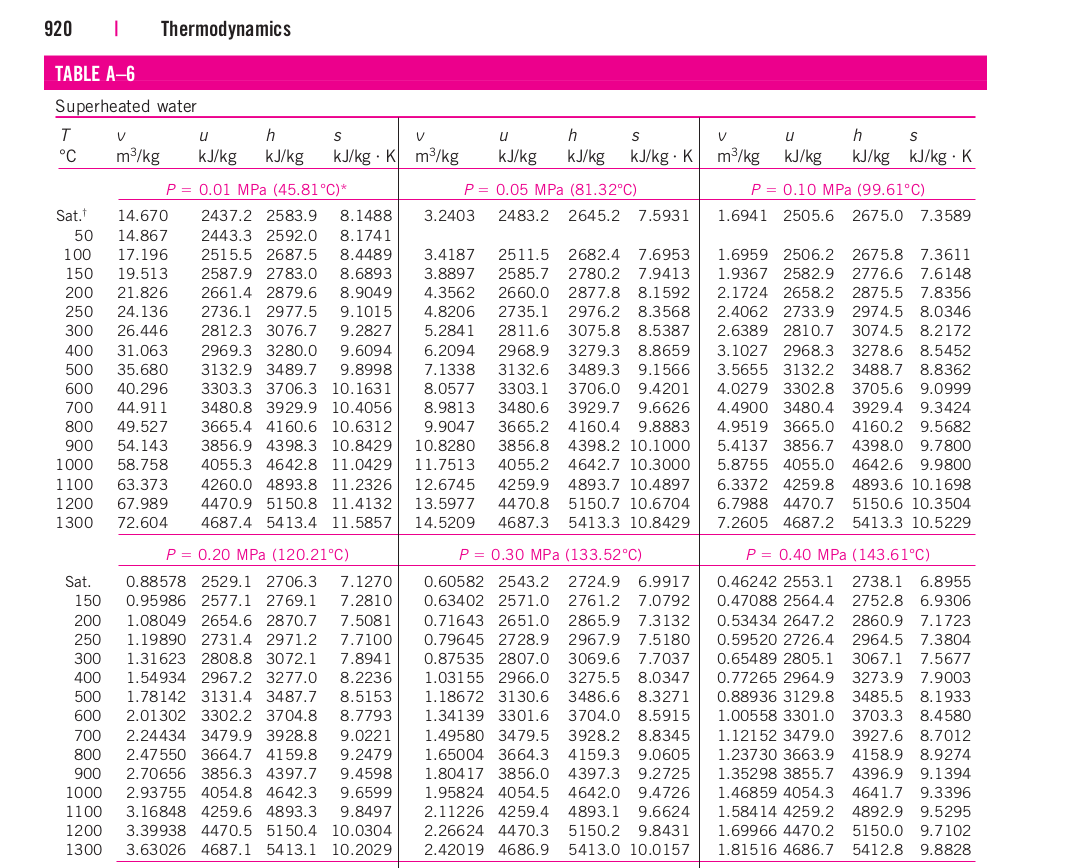


In [11]:
import CoolProp.CoolProp as CP
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Define the substance and range of temperatures
substance = 'Water'
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 1170.15  # Maximum temperature in Kelvin
P = 2e5  # Initial pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Calculate enthalpy values for the given temperatures at the specified pressure
h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', P, 'Water') for T in T_vals]

# Create an initial trace for the H-T diagram
trace = go.Scatter(
    x=h_liquid_vals,
    y=T_vals,
    mode='lines',
    name='P = {} Pa'.format(P),
    line=dict(color='blue')
)

# Create a layout for the plot
layout = go.Layout(
    title='Enthalpy-Temperature (H-T) Diagram',
    xaxis=dict(title='Enthalpy (J/kg)'),
    yaxis=dict(title='Temperature (K)'),
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    #grid=dict(visible=True)
)

# Create the figure object
fig = go.Figure(data=[trace], layout=layout)

# Create an interactive widget to vary the pressure
pressure_slider = widgets.FloatLogSlider(
    value=P,
    base=10,
    min=np.log10(1e3),
    max=np.log10(1e8),
    step=0.01,
    description='Pressure (Pa)',
    readout_format='.1e'
)

# Define an event handler function to update the H-T diagram based on the pressure value
def update_plot(change):
    pressure = change['new']
    h_liquid_vals = [CP.PropsSI('H', 'T', T, 'P', pressure, 'Water') for T in T_vals]
    fig.data[0].x = h_liquid_vals
    fig.data[0].name = 'P = {} Pa'.format(pressure)
    fig.update_layout(title='Enthalpy-Temperature (H-T) Diagram at P = {} Pa'.format(pressure))

# Call the update_plot function initially to populate the initial plot
update_plot({'new': P})

# Connect the pressure slider with the event handler function
pressure_slider.observe(update_plot, 'value')

# Display the plot and the pressure slider
display(fig)
display(pressure_slider)


FloatLogSlider(value=200000.0, description='Pressure (Pa)', max=8.0, min=3.0, readout_format='.1e', step=0.01)

## A plotly dahsboard to interactive with property diagrams

In [12]:
import CoolProp.CoolProp as CP
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Define the range of temperatures
T_min = 275.15  # Minimum temperature in Kelvin
T_max = 1170.15  # Maximum temperature in Kelvin
P_min = 1e3  # Minimum pressure in Pa
P_max = 1e8  # Maximum pressure in Pa

# Create an array of temperatures
T_vals = np.linspace(T_min, T_max, 100)

# Create an array of pressures
P_vals = np.logspace(np.log10(P_min), np.log10(P_max), 100)

# Define the fluid options
fluid_options = ["Water", "Ethanol", "Methanol", "CarbonDioxide"]

# Create dropdown widgets for fluid, y-axis label, and x-axis label
fluid_dropdown = widgets.Dropdown(
    options=fluid_options, value="Water", description="Fluid:"
)

y_label_dropdown = widgets.Dropdown(
    options=["Enthalpy (kJ/kg)", "Entropy (kJ/(kg·K))"],
    value="Enthalpy (kJ/kg)",
    description="Y-Axis:",
)

x_label_dropdown = widgets.Dropdown(
    options=["Temperature (K)", "Pressure (MPa)"],
    value="Temperature (K)",
    description="X-Axis:",
)

# Create an interactive widget to vary the pressure
pressure_slider = widgets.FloatLogSlider(
    value=P_min/1e6,
    base=10,
    min=np.log10(P_min),
    max=np.log10(P_max),
    step=0.01,
    description="Pressure (MPa)",
    readout_format=".1e",
)

# Create an interactive widget to vary the temperature
temperature_slider = widgets.FloatSlider(
    value=T_min, min=T_min, max=T_max, step=1, description="Temperature (K)"
)


def update_plot(fluid, y_label, x_label, pressure, temperature):
    pressure_slider.disabled = x_label == "Pressure (MPa)"
    temperature_slider.disabled = x_label == "Temperature (K)"

    if x_label == "Temperature (K)" and y_label == "Enthalpy (kJ/kg)":
        h_vals = [CP.PropsSI("H", "T", T, "P", pressure, fluid) for T in T_vals]
        x_vals = np.array(h_vals) / 1000
        x_axis_label = y_label
        y_vals = T_vals
        y_axis_label = x_label
    elif x_label == "Temperature (K)" and y_label == "Entropy (kJ/(kg·K))":
        s_vals = [CP.PropsSI("S", "T", T, "P", pressure, fluid) for T in T_vals]
        x_vals = np.array(s_vals) / 1000
        x_axis_label = y_label
        y_vals = T_vals
        y_axis_label = x_label
    elif x_label == "Pressure (MPa)" and y_label == "Enthalpy (kJ/kg)":
        h_vals = [CP.PropsSI("H", "T", temperature, "P", P, fluid) for P in P_vals]
        x_vals = np.array(h_vals) / 1000
        x_axis_label = y_label
        y_vals = np.array(P_vals)/1e6
        y_axis_label = x_label
    elif x_label == "Pressure (MPa)" and y_label == "Entropy (kJ/(kg·K))":
        s_vals = [CP.PropsSI("S", "T", temperature, "P", P, fluid) for P in P_vals]
        x_vals = np.array(s_vals) / 1000
        x_axis_label = y_label
        y_vals = np.array(P_vals)/1e6
        y_axis_label = x_label

    # Create a Plotly figure
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=y_vals,
            mode="lines",
            name="Fluid: {}, P = {} MPa, T = {}".format(
                fluid, round(pressure / 1e6, 2), temperature
            ),
        )
    )
    fig.update_layout(
        title="{}-{} Diagram".format(y_axis_label, x_axis_label),
        xaxis_title=x_axis_label,
        yaxis_title=y_axis_label,
        showlegend=True,
    )
    fig.show()


# Connect the pressure slider, temperature slider, and dropdown widgets with the update function
widgets.interact(
    update_plot,
    fluid=fluid_dropdown,
    y_label=y_label_dropdown,
    x_label=x_label_dropdown,
    pressure=pressure_slider,
    temperature=temperature_slider,
)


interactive(children=(Dropdown(description='Fluid:', options=('Water', 'Ethanol', 'Methanol', 'CarbonDioxide')…

<function __main__.update_plot(fluid, y_label, x_label, pressure, temperature)>

In [13]:
!pwd

/home/hari/projects/OER/jupyter_notebooks/interactive_process_diagram
